In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

amz_df=pd.read_csv('/Users/Lola/Desktop/IronHack_louis/LAB-EDA/lab-eda-univariate/amz_uk_price_prediction_dataset.csv')


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [ ]:
crosstab_result

In [52]:
crosstab_result=pd.crosstab(amz_df['category'], amz_df['isBestSeller'])
crosstab_result=crosstab_result.sort_values(by=True, axis=0, ascending=False)
crosstab_result_2=pd.crosstab(amz_df['category'], amz_df['isBestSeller'])


crosstab_result['Prop_best_seller']=crosstab_result[True]/(crosstab_result[True]+crosstab_result[False])
crosstab_result


isBestSeller,False,True,Prop_best_seller
category,,,
Grocery,9008,556,0.058135
Health & Personal Care,9017,552,0.057686
Baby,14709,341,0.022658
Sports & Outdoors,835935,330,0.000395
Power & Hand Tools,8353,306,0.035339
...,...,...,...
Downhill Ski Boots,1284,0,0.000000
Digital Frames,774,0,0.000000
Motorbike Chassis,107,0,0.000000


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [21]:
! pip install spicy
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association


Defaulting to user installation because normal site-packages is not writeable


In [47]:
chi2_stat, chi2_p_value, _ , _ =chi2_contingency(crosstab_result)
chi2_stat,chi2_p_value


(36684.23786636858, 0.0)

In [53]:
association(crosstab_result_2,method="cramer")

0.1222829439760564

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [59]:
crosstab_result_top5=crosstab_result.head()
crosstab_result_top5

isBestSeller,False,True,Prop_best_seller
category,,,
Grocery,9008,556,0.058135
Health & Personal Care,9017,552,0.057686
Baby,14709,341,0.022658
Sports & Outdoors,835935,330,0.000395
Power & Hand Tools,8353,306,0.035339


<Axes: xlabel='category'>

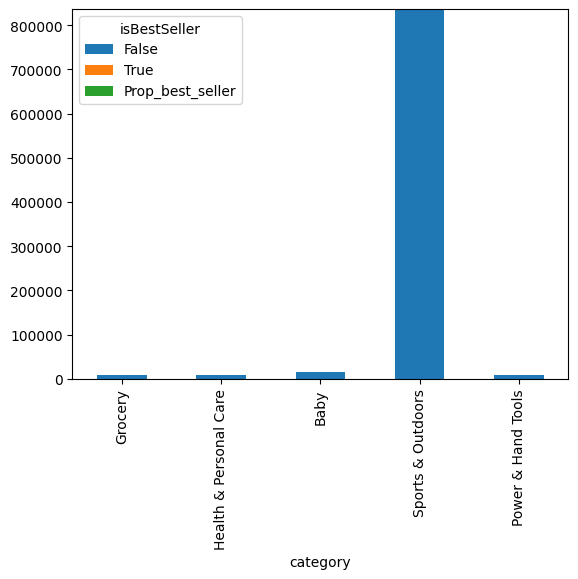

In [62]:
crosstab_result_top5.plot(kind="bar", stacked=True)



<Axes: xlabel='Prop_best_seller', ylabel='category'>

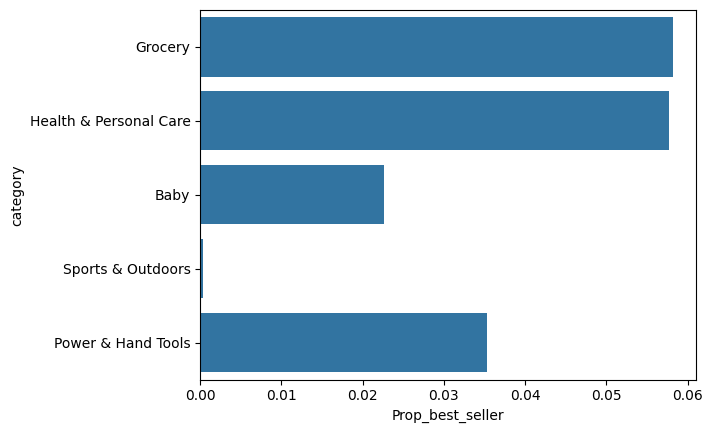

In [61]:
sns.barplot(crosstab_result_top5, x='Prop_best_seller',y="category")